##AIML CA2 Unsupervised Learning

By Koh Hui Lyn (p2021672)
<br>DAAA/2A05

dataset info:
1.   CustomerID: A unique ID assigned to each membership customer
2.   Genre: Gender of user, either Female or Male
3.   Age: Age of each membership customer
4.   Annual Income(k$): Amount of money they earn for each year
5.   Spending Score(1-100): Defined by customer behaviour and purchasing data. Higher score refers to higher purchasing power.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/CA2/Mall_Customers.csv")
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##Data Exploration

In [ ]:
#Checking for null values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#CustomerID might not be so useful to keep
df = df.drop('CustomerID', axis=1)

In [ ]:
#Change the col names to more simpler names
df.columns = ['Gender', 'Age', 'Income', 'Score']
df.head(5)

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Checking to see if there are any visible clusters in any of the columns

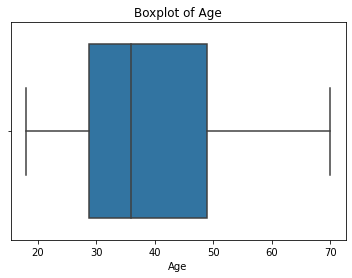

In [ ]:
#Box plot of age
sns.boxplot(df['Age'])
plt.title("Boxplot of Age")
plt.show()

Income has an outlier, but it's around 140K annual income. I felt that ~12k a month was an possible amount to earn so I decided to keep it.

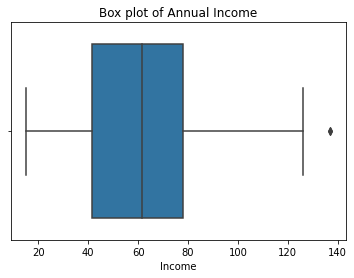

In [ ]:
#Box plot of Income
sns.boxplot(df['Income'])
plt.title("Box plot of Annual Income")
plt.show()

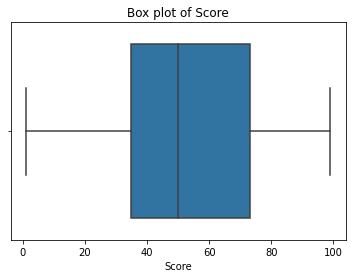

In [ ]:
#Box plot of Score
sns.boxplot(df['Score'])
plt.title("Box plot of Score")
plt.show()

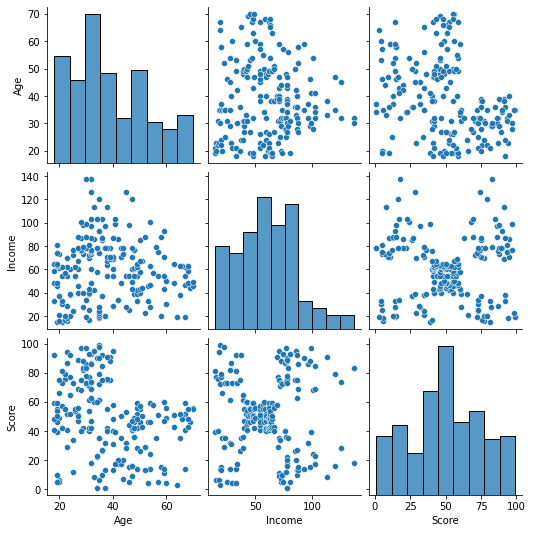

In [ ]:
sns.pairplot(df)

As seen by the Bar Plot below, the Gender column is unbalanced - there are more Female values than Male values.

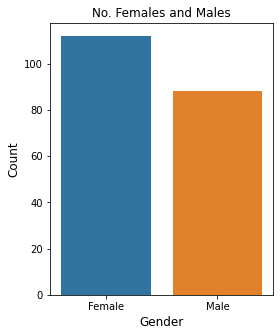

In [ ]:
#Plotting a Bar graph with counts of Gender M & F vals
#check if data is balanced
count = df['Gender'].value_counts()
plt.figure(figsize=(4,5))
sns.barplot(['Female','Male'], count.values)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.title("No. Females and Males")
plt.show()

See if there is any obvious relationship between Gender and others

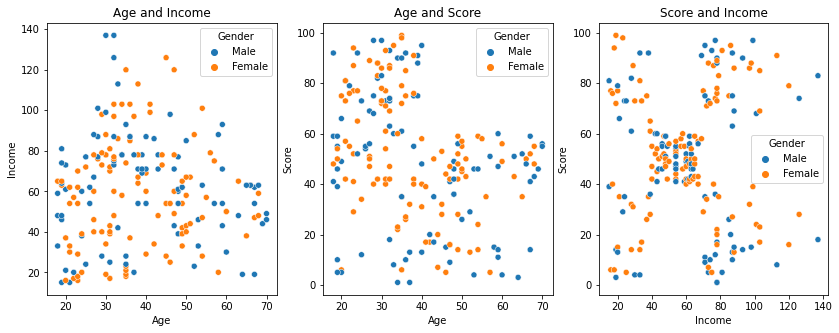

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
a = sns.scatterplot( x=df["Age"], y=df["Income"], hue=df["Gender"], ax=ax[0])
a.title.set_text("Age and Income")
b = sns.scatterplot( x=df["Age"], y=df["Score"], hue=df["Gender"], ax=ax[1]) 
b.title.set_text("Age and Score")
c = sns.scatterplot( x=df["Income"], y=df["Score"], hue=df["Gender"], ax=ax[2]) 
c.title.set_text("Score and Income")
plt.show()

It doesn't look like Gender will help us cluster, so can drop.

In [ ]:
X = df.drop(columns=['Gender'])

In [ ]:
#Looking at the difference in variance
X.var()

Age       195.133166
Income    689.835578
Score     666.854271
dtype: float64

Since the variance of age income and score is less than 10x magnitude of each other, don't need to scale the data.


##K-Means with Income and Score

Looking at the silhouette score, it suggests that we should use n_clusters = 6 as it has the highest silhoutte score.

In [ ]:
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans 
 
for n_cluster in range(2, 11): 
    kmeans = KMeans(n_clusters=n_cluster).fit(X) 
    label = kmeans.labels_ 
    sil_coeff = silhouette_score(X, label, metric='euclidean') 
    print("For n_clusters={}, The Silhouette Coefficient is {}".format( 
            n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.293166070535953
For n_clusters=3, The Silhouette Coefficient is 0.3839349967742105
For n_clusters=4, The Silhouette Coefficient is 0.40570340605429833
For n_clusters=5, The Silhouette Coefficient is 0.44428597560893024
For n_clusters=6, The Silhouette Coefficient is 0.4523443947724053
For n_clusters=7, The Silhouette Coefficient is 0.4425519515674553
For n_clusters=8, The Silhouette Coefficient is 0.42627498428462474
For n_clusters=9, The Silhouette Coefficient is 0.4054231743200336
For n_clusters=10, The Silhouette Coefficient is 0.3860667185028747


The Elbow plot also shows becomes less steep at k=6, thus also implying that we should use 6 clusters

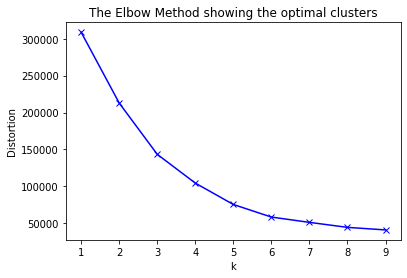

In [ ]:
# Elbow method
#distance = large if inertia is large
#lower inertia = better
distortions = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X)
  distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal clusters")
plt.show()

Doing K-Means with Income and Score. Visually, it looks like it's 5 clusters.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


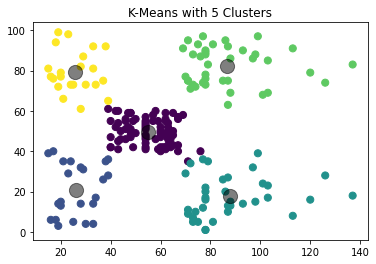

In [ ]:
# K-means Clustering 
from sklearn.cluster import KMeans 
# fit a Kmeans model to the data 
km = KMeans(n_clusters=5) 
km.fit(X) 
print(km) 
# Visualize the results 
import matplotlib.pyplot as plt 
y_kmeans = km.predict(X) 
# scatter plot of Income and Score
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=y_kmeans, s=50, cmap='viridis') 
# show centroid centres as grey circle opacity 50% 
centers = km.cluster_centers_ 
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)
plt.title("K-Means with 5 Clusters")
plt.show()

In [ ]:
labels = km.labels_
centroids = km.cluster_centers_
#Adding a "Clusters" tab next to X to see which cluster the row belongs to
X['labels'] = labels
#Plotting 3D Scattergraph (INCOME AND SPENDING SCORE VIEW)
import plotly.graph_objs as go
import plotly.offline as po
trace1 = go.Scatter3d(
    x = X['Age'],
    y = X['Score'],
    z = X['Income'],
    mode='markers',
    marker=dict(
        color=X['labels'], #Set colour of points to be for each cluster
        size=10,
        line=dict(color=X['labels'], width=12),
        opacity=0.8)
)

df = [trace1]
layout = go.Layout(
    margin = dict(t=0, r=0, l=0, b=0),
    #Setting titles for axis
    scene = dict(
        xaxis = dict(title = 'Age (X)'),
        yaxis = dict(title = 'Spending Score (Y)'),
        zaxis = dict(title = 'Annual Income (Z)'))
)

name = 'Income and Spending Score View'
camera = dict(
    eye=dict(x=2.5, y=0., z=0.)
)

fig = go.Figure(data = df, layout = layout,)
fig.update_layout(scene_camera=camera, title=name)
po.iplot(fig)

However, let's try doing n_clusters = 6 as given by the Silhouette Score and Elbow plot.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


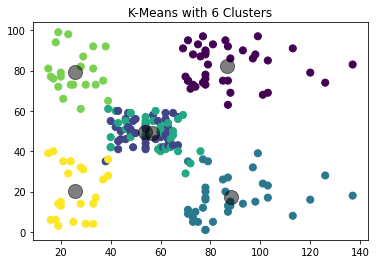

In [ ]:
# K-means Clustering 
from sklearn.cluster import KMeans 
# fit a Kmeans model to the data 
km = KMeans(n_clusters=6) 
km.fit(X) 
print(km) 
# Visualize the results 
import matplotlib.pyplot as plt 
y_kmeans = km.predict(X) 
# scatter plot of Income and Score
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=y_kmeans, s=50, cmap='viridis') 
# show centroid centres as grey circle opacity 50% 
centers = km.cluster_centers_ 
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)
plt.title("K-Means with 6 Clusters")
plt.show()

By looking at this 2D scatterplot, we can visually see that there are 5 clusters. However, the Elbow Plot and the Silhouette Score both tell us that there are supposed to be 6 Clusters. Looking at our plot, the clusters in the middle seem to be quite random and messy. Thus, maybe using Income and Score is not enough to fully understand our clusters. Thus, we can try and use all 3 Columns, ie Age, Income and Score to see if the clusters become clearer.

##K-Means with Age, Income and Score

In [ ]:
# K-means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# fit a Kmeans model to the data
km = KMeans(n_clusters = 6)
km.fit(X)
labels = km.labels_
centroids = km.cluster_centers_
#Adding a "Clusters" tab next to X to see which cluster the row belongs to
X['labels'] = labels

Plotting a 3D scattergraph with Age, Score and Income (I plotted multiple views so don't have to rotate)

###K-Means Annual Income and Spending Score View

In [ ]:
#Plotting 3D Scattergraph (INCOME AND SPENDING SCORE VIEW)
import plotly.graph_objs as go
import plotly.offline as po
trace1 = go.Scatter3d(
    x = X['Age'],
    y = X['Score'],
    z = X['Income'],
    mode='markers',
    marker=dict(
        color=X['labels'], #Set colour of points to be for each cluster
        size=10,
        line=dict(color=X['labels'], width=12),
        opacity=0.8)
)

df = [trace1]
layout = go.Layout(
    margin = dict(t=0, r=0, l=0, b=0),
    #Setting titles for axis
    scene = dict(
        xaxis = dict(title = 'Age (X)'),
        yaxis = dict(title = 'Spending Score (Y)'),
        zaxis = dict(title = 'Annual Income (Z)'))
)

name = 'Income and Spending Score View'
camera = dict(
    eye=dict(x=2.5, y=0., z=0.)
)

fig = go.Figure(data = df, layout = layout,)
fig.update_layout(scene_camera=camera, title=name)
po.iplot(fig)

###K-Means Annual Income and Age View

In [ ]:
#Plotting 3D Scattergraph (AGE AND ANNUAL INCOME VIEW)
import plotly.graph_objs as go
import plotly.offline as po
trace1 = go.Scatter3d(
    x = X['Age'],
    y = X['Score'],
    z = X['Income'],
    mode='markers',
    marker=dict(
        color=X['labels'], #Set colour of points to be for each cluster
        size=10,
        line=dict(color=X['labels'], width=12),
        opacity=0.8)
)

df = [trace1]
layout = go.Layout(
    margin = dict(t=0, r=0, l=0, b=0),
    #Setting titles for axis
    scene = dict(
        xaxis = dict(title = 'Age (X)'),
        yaxis = dict(title = 'Spending Score (Y)'),
        zaxis = dict(title = 'Annual Income (Z)'))
)

name = 'Age and Annual Income View'
camera = dict(
    eye=dict(x=0., y=2.5, z=0.)
)

fig = go.Figure(data = df, layout = layout,)
fig.update_layout(scene_camera=camera, title=name)
po.iplot(fig)

###K-Means Age and Spending Score View

In [ ]:
#Plotting 3D Scattergraph (AGE AND SPENDING SCORE VIEW)
import plotly.graph_objs as go
import plotly.offline as po
trace1 = go.Scatter3d(
    x = X['Age'],
    y = X['Score'],
    z = X['Income'],
    mode='markers',
    marker=dict(
        color=X['labels'], #Set colour of points to be for each cluster
        size=10,
        line=dict(color=X['labels'], width=12),
        opacity=0.8)
)

df = [trace1]
layout = go.Layout(
    margin = dict(t=0, r=0, l=0, b=0),
    #Setting titles for axis
    scene = dict(
        xaxis = dict(title = 'Age (X)'),
        yaxis = dict(title = 'Spending Score (Y)'),
        zaxis = dict(title = 'Annual Income (Z)'))
)

name = 'Age and Spending Score View'
camera = dict(
    eye=dict(x=0., y=0, z=2.5)
)

fig = go.Figure(data = df, layout = layout,)
fig.update_layout(scene_camera=camera, title=name)
po.iplot(fig)

###K-Means Clusters Analysis
**Choose n_clusters=5 or n_clusters = 6?**

From the n_clusters=6 plot, we can see that there are in fact, two clusters around 35-60 Spending Score, and 35-75 Annual Income that can be seperated into 2 big age groups. This can be useful for marketing as these 2 different age groups probably will have different likes/interests that can be marketed to. Thus it will be better to seperate them into two groups instead of just taking them as one big one.


---


**n_clusters=6 Clusters Analysis**
<br>Here we see that there are in fact 6 clear clusters. Unfortunately, the colours change each time, but I'll include explanation for the clusters with colour in my video!

(Open in colab for the headers for easy checking !!)

Cluster 1 is Low-Mid range Age of around 20-35, with a Mid-High range Spending Score of around 60-100, but with a Low-Mid range Annual Income of about `$`15k-`$`40k.

Cluster 2 is Low-Mid range Age of around 30-40, with a Mid-High range spending Score of around 60-100, and a Mid-High range Annual Income of about `$`70k-`$`140k (Most of which falling nearer to `$`70k than `$`140k)

Cluster 3 is Mid-High range Age of around 40-70, with a Mid range Spending Score of about 35-60, and a Low-Mid range Annual Income of about `$`35k-`$`70k.

Cluster 4 is Low-Mid range Age of around 20-40, with a Mid range Spending Score of around 30-60, and a Low-Mid range Annual Income of about `$`40k-`$`75k.

Cluster 5 is Low-High range Age of around 20-60, with a Low-Mid range Spending Score of around 1-40 (Most of which being closer to 1 than 40), and a Mid-High range Annual Income of around `$`70k-`$`140k. (Most of which being closer to `$`70k than `$`140k)

Cluster 6 is a Low-High range Age of around 20-60, with a Low-Mid range Spending Score of around 1-40, and a Low-Mid range Annual Income of around `$`15k-`$`40k.




##Gaussian Mixture Model

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/CA2/Mall_Customers.csv")
df = df.drop('CustomerID', axis=1)
df.columns = ['Gender', 'Age', 'Income', 'Score']
X = df.drop(columns=['Gender'])

Silhouette Score

In [ ]:
from sklearn.mixture import GaussianMixture
for n_component in range(2, 13): 
    gmm = GaussianMixture(n_components=n_component).fit(X) 
    label = gmm.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean') 
    print("For n_components={}, The Silhouette Coefficient is {}".format( 
            n_component, sil_coeff))

For n_components=2, The Silhouette Coefficient is 0.2884331205341529
For n_components=3, The Silhouette Coefficient is 0.30869089043974485
For n_components=4, The Silhouette Coefficient is 0.3776529904023892
For n_components=5, The Silhouette Coefficient is 0.4381804307737703
For n_components=6, The Silhouette Coefficient is 0.4458378313266269
For n_components=7, The Silhouette Coefficient is 0.40999960024746124
For n_components=8, The Silhouette Coefficient is 0.39149075637672626
For n_components=9, The Silhouette Coefficient is 0.35622622402711224
For n_components=10, The Silhouette Coefficient is 0.3427458279323741
For n_components=11, The Silhouette Coefficient is 0.35564999687062454
For n_components=12, The Silhouette Coefficient is 0.3146718890526522


The silhouette score suggests that we should use n_components=6 as it is the highest.

BIC

In [ ]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [ ]:
#Bayesian information criterion (BIC)
n_clusters=np.arange(2, 20)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X) 
        tmp_bic.append(gmm.bic(X))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

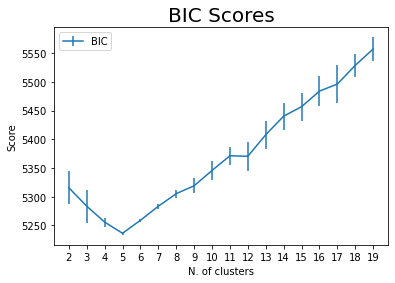

In [ ]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

The lower the BIC the better, so the BIC Score suggests that we should use n_clusters = 5.

Distance between GMMs

In [ ]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

In [ ]:
from sklearn.model_selection import train_test_split
n_clusters=np.arange(2, 18)
iterations=18
results=[]
res_sigs=[]
for n in n_clusters:
    dist=[]
    
    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        
        gmm_train=GaussianMixture(n, n_init=2).fit(train) 
        gmm_test=GaussianMixture(n, n_init=2).fit(test) 
        dist.append(gmm_js(gmm_train, gmm_test))
    selec=SelBest(np.array(dist), int(iterations/5))
    result=np.mean(selec)
    res_sig=np.std(selec)
    results.append(result)
    res_sigs.append(res_sig)

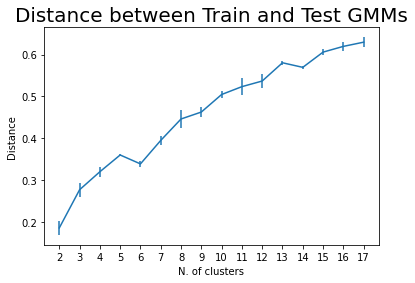

In [ ]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

A good number of clusters is one that has lesser distance between the 2 GMMS (implying that the gmms are the same), and more stable, where the error bar is small. Thus maybe n_clusters = 6 would be a good pick as the error bar is small, and it doesn't have too little clusters, and also the distance between it and the other GMM is lesser than 5.

What n_clusters to use?

Silhouette Score - n_clusters = 6
BIC - n_clusters = 5
Distance between GMMS - n_clusters = 6

We should do n_clusters = 6

Take n_components = 6 as suggested by the Silhouette Score.
Looking at this plot, probably need to be 3D Scatterplot as well.

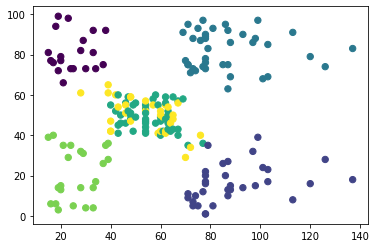

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6).fit(X)
labels = gmm.predict(X)
plt.scatter(X['Income'], X['Score'], c=labels, s=40, cmap='viridis');

###GMM Annual Income and Spending Score View

In [ ]:
#Annual Income and Spending Score View
gmm = GaussianMixture(n_components=6).fit(X)
labels = gmm.predict(X)
#Adding a "Clusters" tab next to X to see which cluster the row belongs to
X['labels'] = labels
#Plotting 3D Scattergraph
import plotly.graph_objs as go
import plotly.offline as po
trace1 = go.Scatter3d(
    x = X['Age'],
    y = X['Score'],
    z = X['Income'],
    mode='markers',
    marker=dict(
        color=X['labels'], #Set colour of points to be for each cluster
        size=10,
        line=dict(color=X['labels'], width=12),
        opacity=0.8)
)

df = [trace1]
layout = go.Layout(
    margin = dict(t=0, r=0, l=0, b=0),
    #Setting titles for axis
    scene = dict(
        xaxis = dict(title = 'Age (X)'),
        yaxis = dict(title = 'Spending Score (Y)'),
        zaxis = dict(title = 'Annual Income (Z)'))
)

name = 'Income and Spending Score View'
camera = dict(
    eye=dict(x=2.5, y=0., z=0.)
)

fig = go.Figure(data = df, layout = layout,)
fig.update_layout(scene_camera=camera, title=name)
po.iplot(fig)

###GMM Annual Income and Age View

In [ ]:
gmm = GaussianMixture(n_components=6).fit(X)
labels = gmm.predict(X)
#Adding a "Clusters" tab next to X to see which cluster the row belongs to
X['labels'] = labels
#Plotting 3D Scattergraph
import plotly.graph_objs as go
import plotly.offline as po
trace1 = go.Scatter3d(
    x = X['Age'],
    y = X['Score'],
    z = X['Income'],
    mode='markers',
    marker=dict(
        color=X['labels'], #Set colour of points to be for each cluster
        size=10,
        line=dict(color=X['labels'], width=12),
        opacity=0.8)
)

df = [trace1]
layout = go.Layout(
    margin = dict(t=0, r=0, l=0, b=0),
    #Setting titles for axis
    scene = dict(
        xaxis = dict(title = 'Age (X)'),
        yaxis = dict(title = 'Spending Score (Y)'),
        zaxis = dict(title = 'Annual Income (Z)'))
)

name = 'Income and Spending Score View'
camera = dict(
    eye=dict(x=0, y=2.5, z=0.)
)

fig = go.Figure(data = df, layout = layout,)
fig.update_layout(scene_camera=camera, title=name)
po.iplot(fig)

###GMM Age and Spending Score View

In [ ]:
gmm = GaussianMixture(n_components=6).fit(X)
labels = gmm.predict(X)
#Adding a "Clusters" tab next to X to see which cluster the row belongs to
X['labels'] = labels
#Plotting 3D Scattergraph
import plotly.graph_objs as go
import plotly.offline as po
trace1 = go.Scatter3d(
    x = X['Age'],
    y = X['Score'],
    z = X['Income'],
    mode='markers',
    marker=dict(
        color=X['labels'], #Set colour of points to be for each cluster
        size=10,
        line=dict(color=X['labels'], width=12),
        opacity=0.8)
)

df = [trace1]
layout = go.Layout(
    margin = dict(t=0, r=0, l=0, b=0),
    #Setting titles for axis
    scene = dict(
        xaxis = dict(title = 'Age (X)'),
        yaxis = dict(title = 'Spending Score (Y)'),
        zaxis = dict(title = 'Annual Income (Z)'))
)

name = 'Income and Spending Score View'
camera = dict(
    eye=dict(x=0., y=0., z=2.5)
)

fig = go.Figure(data = df, layout = layout,)
fig.update_layout(scene_camera=camera, title=name)
po.iplot(fig)

###GMM Clusters Analysis

GMM returns similar looking clusters to K-Means.

Cluster 1 has a Low-High Age range of around 20-70, Low-Mid Spending Score range 1-40, Annual Income of `$`15k-`$`40k

Cluster 2 has a Low-Mid Age range of around 20-60, Low-Mid Spending Score range of around 1-40, and Mid-High Annual Income range of around `$`70k-`$`140k

Cluster 3 has a (smaller variance compared to the rest)Low-Mid Age range of around 20-35, Low-Mid Spending Score of around 30-60, and Low-Mid Annual Income range of around `$`40k-`$`75k

Cluster 4 has a (smaller variance compared to the rest) Low-Mid Age range of around 30-40, Mid-High Spending Score range of around 60-100, and Mid-High Annual Income range of around `$`70k-`$`140k.

Cluster 5 has a (smaller variance compared to the rest) Low-Mid Age range of around 20-35, Mid-High Spending Score range of around  range 60-100, and a Low-Mid Annual Income range of `$`20k-`$`65k

Cluster 6 has a Mid-High Age range of around 40-70, Low-Mid Spending Score range of around 35-60, and a Mid Annual Income range of 45-80



##DBScan

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/CA2/Mall_Customers.csv")
df = df.drop('CustomerID', axis=1)
df.columns = ['Gender', 'Age', 'Income', 'Score']
X = df.drop(columns=['Gender'])

The best epsilon value will be at the point of maximum curvature, so I just took it as 8

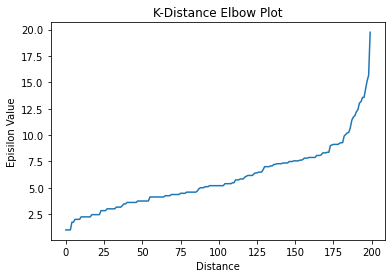

In [ ]:
#Looking for the best Epsilon value
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title("K-Distance Elbow Plot")
plt.ylabel("Episilon Value")
plt.xlabel("Distance")
plt.show()

Min points should be 2 x Dimensions
so in my case it's 2 x 3 columns = 6

In [ ]:
# Compute DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=8, min_samples=6).fit(X)
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 8
Estimated no. of noise points: 118


###DBScan Annual Income and Spending Score View

In [ ]:
#Annual Income and Spending Score View
#Adding a "Clusters" tab next to X to see which cluster the row belongs to
X['labels'] = labels
#Plotting 3D Scattergraph
import plotly.graph_objs as go
import plotly.offline as po
trace1 = go.Scatter3d(
    x = X['Age'],
    y = X['Score'],
    z = X['Income'],
    mode='markers',
    marker=dict(
        color=X['labels'], #Set colour of points to be for each cluster
        size=10,
        line=dict(color=X['labels'], width=12),
        opacity=0.8)
)

df = [trace1]
layout = go.Layout(
    margin = dict(t=0, r=0, l=0, b=0),
    #Setting titles for axis
    scene = dict(
        xaxis = dict(title = 'Age (X)'),
        yaxis = dict(title = 'Spending Score (Y)'),
        zaxis = dict(title = 'Annual Income (Z)'))
)

name = 'Income and Spending Score View'
camera = dict(
    eye=dict(x=2.5, y=0., z=0.)
)

fig = go.Figure(data = df, layout = layout,)
fig.update_layout(scene_camera=camera, title=name)
po.iplot(fig)

###DBScan Annual Income and Age View

In [ ]:
#Annual Income and Age
#Adding a "Clusters" tab next to X to see which cluster the row belongs to
X['labels'] = labels
#Plotting 3D Scattergraph
import plotly.graph_objs as go
import plotly.offline as po
trace1 = go.Scatter3d(
    x = X['Age'],
    y = X['Score'],
    z = X['Income'],
    mode='markers',
    marker=dict(
        color=X['labels'], #Set colour of points to be for each cluster
        size=10,
        line=dict(color=X['labels'], width=12),
        opacity=0.8)
)

df = [trace1]
layout = go.Layout(
    margin = dict(t=0, r=0, l=0, b=0),
    #Setting titles for axis
    scene = dict(
        xaxis = dict(title = 'Age (X)'),
        yaxis = dict(title = 'Spending Score (Y)'),
        zaxis = dict(title = 'Annual Income (Z)'))
)

name = 'Income and Spending Score View'
camera = dict(
    eye=dict(x=0, y=2.5, z=0.)
)

fig = go.Figure(data = df, layout = layout,)
fig.update_layout(scene_camera=camera, title=name)
po.iplot(fig)

###DBScan Age and Spending Score View

In [ ]:
#Annual Income and Spending Score View
#Adding a "Clusters" tab next to X to see which cluster the row belongs to
X['labels'] = labels
#Plotting 3D Scattergraph
import plotly.graph_objs as go
import plotly.offline as po
trace1 = go.Scatter3d(
    x = X['Age'],
    y = X['Score'],
    z = X['Income'],
    mode='markers',
    marker=dict(
        color=X['labels'], #Set colour of points to be for each cluster
        size=10,
        line=dict(color=X['labels'], width=12),
        opacity=0.8)
)

df = [trace1]
layout = go.Layout(
    margin = dict(t=0, r=0, l=0, b=0),
    #Setting titles for axis
    scene = dict(
        xaxis = dict(title = 'Age (X)'),
        yaxis = dict(title = 'Spending Score (Y)'),
        zaxis = dict(title = 'Annual Income (Z)'))
)

name = 'Income and Spending Score View'
camera = dict(
    eye=dict(x=0, y=0., z=2.5)
)

fig = go.Figure(data = df, layout = layout,)
fig.update_layout(scene_camera=camera, title=name)
po.iplot(fig)

###DBScan Clusters Analysis
From the plot, there are 8 Clusters.
Although I picked the best epsilon values according to the elbow plot, the clusters that the DBScan found look very messy and hard to seperate into distinct groups.


##Choosing which model to use

I think that between K-Means, GMM, and DBScan, I will choose K-Means.

I think the DBSCan is the worst one as the clusters are messy, and it is hard to split the generated clusters into Easy to identify Groups.

Thus DBScan is instantly out.

K-Means and GMM give groupable clusters but between the two, K-mean's silhouette score is slightly higher. Thus I think K-Means is slightly better than GMM, so I will use the K-Means clusters.

##Marketing Strategies

Cluster 1 is Low-Mid range Age of around 20-35, with a Mid-High range Spending Score of around 60-100, but with a Low-Mid range Annual Income of about `$`15k-`$`40k.

-can target this cluster by providing them with discount coupons (ie 20% off Minimum spend $X).  Since these people already visit the store so much, likely to buy more things with this discount and spend more  
-Since they are aged 20-35, can target them by giving discounts for shops that they would visit like Electronics, Fashion (maybe H&M, Uniqlo etc) 

Cluster 2 is Low-Mid range Age of around 30-40, with a Mid-High range spending Score of around 60-100, and a Mid-High range Annual Income of about `$`70k-`$`140k (Most of which falling nearer to `$`70k than `$`140k)

-Can target them by having more expensive stores in the mall 

Ie maybe have more expensive restaurants/buffets in the mall

 Ie can have more expensive brands in the mall like Gucci etc 

Cluster 3 is Mid-High range Age of around 40-70, with a Mid range Spending Score of about 35-60, and a Low-Mid range Annual Income of about `$`40k-`$`65k.

-Can target them by maybe including more resting spots 

Ie Tables where they can sit with their friends and gather, and near the tables can have F&B stores so they can sit there and have a bite etc 

Cluster 4 is Low-Mid range Age of around 20-40, with a Mid range Spending Score of around 30-60, and a Low-Mid range Annual Income of about `$`40k-`$`75k.

-Can target them by maybe having free WIFI in the mall as they are younger. 

-Then can also have resting spaces for them with F&B nearby 

Cluster 5 is Low-High range Age of around 20-60, with a Low-Mid range Spending Score of around 1-40 (Most of which being closer to 1 than 40), and a Mid-High range Annual Income of around `$`70k-`$`140k. (Most of which being closer to `$`70k than `$`140k)

-Have to attract them to spend in the store 

-Have more high-class stores 

-Can implement a Loyalty rewards scheme ie points system to get them to come back and spend 

Cluster 6 is a Low-High range Age of around 20-60, with a Low-Mid range Spending Score of around 1-40, and a Low-Mid range Annual Income of around `$`15k-`$`40k.

-Have to attract them to spend in the store 

-Have more high-class stores 

-Can implement a Loyalty rewards scheme 

ie points system to get them to come back and spend 